## Part C. Self-Taught Learning

#### Importing required libraries

In [1]:
library(h2o)
library(ggplot2)
library(reshape)
options(warn=-1)

Warning message:
"package 'h2o' was built under R version 3.6.3"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'reshape' was built under R version 3.6.3"

### Question 3 [Self Taught Neural Network Learning]

1. Load Task2C_labeled.csv, Task2C_unlabeled.csv and Task2C_test.csv data sets and required libraries (e.g., H2O). Note that we are going to use Task2C_labeled.csv and Task2C_unlabeled.csv for training the autoencoder. We are going to use Task2C_labeled.csv for training the classifier. Finally, we evaluate the trained classifier on the test Task2C_test.csv.

First we initialise h2o to be used.

In [2]:
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE)
options(warn=-1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\ahhan\AppData\Local\Temp\RtmpGMvzqZ\file27006f386939/h2o_THE_started_from_r.out
    C:\Users\ahhan\AppData\Local\Temp\RtmpGMvzqZ\file27001d482974/h2o_THE_started_from_r.err


Starting H2O JVM and connecting: ....... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         16 seconds 216 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.0.1 
    H2O cluster version age:    2 months and 9 days  
    H2O cluster name:           H2O_started_from_R_THE_gqz587 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   6.00 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 

Reading data and getting it ready for model training and testing

* Importing file - h2o.importFile()
* Binding two h2o frames - h2o.rbind()   # row bind

In [3]:
labeled.frame <- h2o.importFile(path = 'C:/Users/ahhan/Desktop/UNITS/SEM3/Machine Learning/ass2/Task2C_labeled.csv',sep=',') 
unlabeled.frame <- h2o.importFile(path = 'C:/Users/ahhan/Desktop/UNITS/SEM3/Machine Learning/ass2/Task2C_unlabeled.csv' ,sep=',') 
test.frame <- h2o.importFile(path = 'C:/Users/ahhan/Desktop/UNITS/SEM3/Machine Learning/ass2/Task2C_test.csv' ,sep=',') 

# omitting the rows with NA values 
unlabeled.frame <- h2o.na_omit(unlabeled.frame)
labeled.frame <- h2o.na_omit(labeled.frame)
test.frame <- h2o.na_omit(test.frame)

labeled.frame[,1] <- as.factor(labeled.frame$label)
unlabeled.frame[,1] <- NA
train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1]) #we are slicing our data to omit the label column
test.frame[,1] <- as.factor(test.frame$label)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


PEEK at data

In [4]:
cat("LABELED FRAME")
head(labeled.frame,2)
cat("UNLABELED FRAME")
head(unlabeled.frame,2)
cat("TRAIN FRAME")
head(train.frame,2)
cat("TEST FRAME")
head(test.frame,2)

LABELED FRAME

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198
0,0,0,0,0,0,0,0,0,0,...,179,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


UNLABELED FRAME

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198
NaN,0,0,0,0,0,0,0,0,0,...,179,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TRAIN FRAME

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TEST FRAME

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198
3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BR>
2. Train an autoencoder (similar to Activity 5.2) with only one hidden layer and change the number of its neurons to: 20, 40, 60, 80, …, 400 (i.e. from 20 to 400 with a step size of 20).

### Training Autoencoders <br>
* Here we train our autoencoder with a single hidden layer and number of neurons in the range from 20 to 400 with step size of 20
* We have used h2o.deeplearning() to implement the autoencoders
* Activation function used is tanh
* Maximum iterations has been set to 100 i.e. epochs
* We are storing all the 20 generated autoencoder models in a vector list 

In [5]:
options(warn=-1)
NN.model.objects = vector('list')  # Vector to store all the autoencoder model objects

for (k in seq(20, 400, 20)){
    # training autoencoder with k neurons in code layer, hence we get k compressed o/p from code layer
    NN.model.1 = h2o.deeplearning(    
        x = 2:785, # select all pixels
        training_frame = train.frame, # specify the frame   
        hidden = c(k), # number units
        epochs = 100, # maximum number of epoches  
        activation = 'Tanh', # activation function 
        autoencoder = TRUE  # is it an autoencoder? Yes!
        )
    NN.model.objects = c(NN.model.objects,NN.model.1)
    }

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

3. For each model in Step II, calculate and record the reconstruction error which is simply the average (over all data points while the model is fixed) of Euclidian distances between the input and output of the autoencoder (you can simply use “h2o.anomaly()” function). Plot these values where the x-axis is the number of units in the middle layer and the y-axis is the reconstruction error. Then, save and attach the plot to your PDF report. Explain your findings based on the plot in your PDF report.

#### h2o.anomaly - It is used to calculate the reconstruction error of each input/image <br>

* Each autoencoder model developed earlier is used to calculate the error on train.frame

In [6]:
error_df <- data.frame(no_of_neurons=integer(),reconstruction_error=double()) # empty dataset to store reconstruction errors

neurons = 20 #initial number of neurons for code layer of autoencoder

for (k in 1:20){
    
    error =sum(h2o.anomaly(NN.model.objects[[k]],train.frame))/ nrow(h2o.anomaly(NN.model.objects[[k]],train.frame))# mean error
    error_df[nrow(error_df) + 1,] = c(neurons , error)
    neurons = neurons + 20
    
}
head(error_df)

no_of_neurons,reconstruction_error
20,0.028878850
40,0.013819752
60,0.006269800
80,0.003755564
100,0.001483377
120,0.001194911


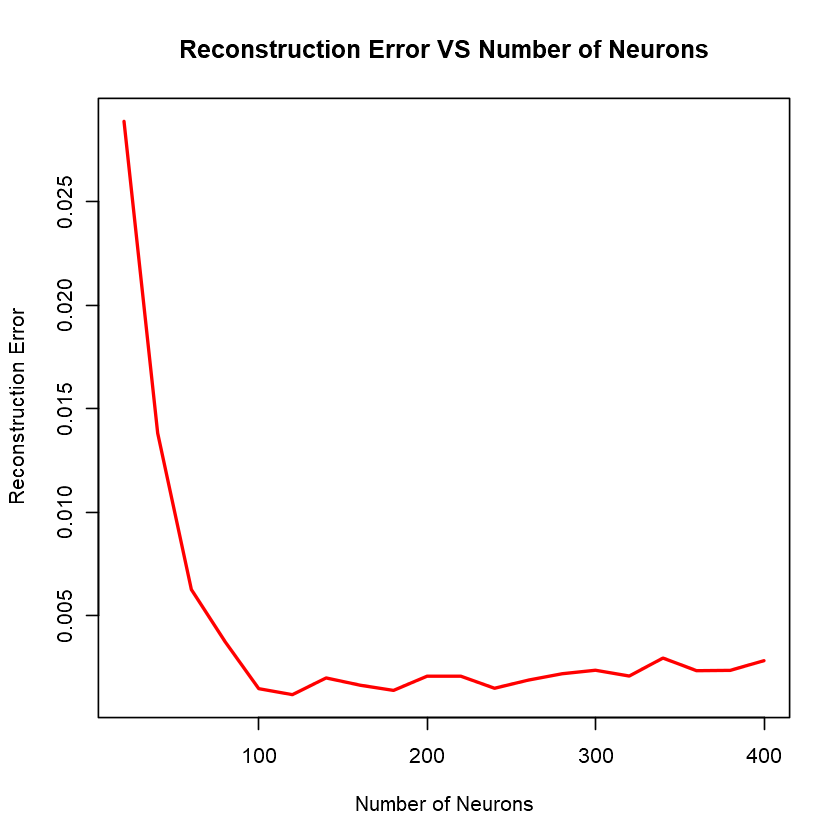

In [7]:
plot(error_df$no_of_neurons,error_df$reconstruction_error, type="l", col="red", lwd=2, xlab="Number of Neurons", ylab="Reconstruction Error", main="Reconstruction Error VS Number of Neurons")

* For number of neurons between 20 to 100, their is a rapid decrease in the reconstruction error.
* The reconstruction error shows minor fluctuations post 100 neurons.
* As the number of neurons in the code layer increases the output is closer to the input.

4. Build the 3-layer NN from Activity 5.1 or “h2o.deeplearning” function (make sure you set “ autoencoder = FALSE”) to build a classification model using all the original attributes from the training set and change the number of its neurons to: 20, 40, 60, 80, .., 400 like Step II. For each model, calculate and record the test error.

Below we have defined an error function to calculate error for NN model based on test.label and predicted label

In [8]:
error.rate <- function(Y1, T1){
  if (nrow(Y1)!=nrow(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/nrow(T1))
}

### 3-Layer Neural Network <br>

* h2o.deeplearning() with autoencoder=False is used to develop a 3-Layer NN
* We have used l2 regularisation for our model, setting parameter = 0.1
* We run the model k times were k is ranging between 20 to 400 with step size of 20. Here, k is the number of neurons.
* Finally we calculate the error on our test.frame using h2o.predict() function and error.rate() function

In [9]:
error_df_NN <- data.frame(no_of_neurons=integer(),test_error=double()) # empty dataset
NN.objects = vector('list')
# neurons = 20
options(warn=-1)

for (k in seq(20,400,20)) {
    
    # build a neural network classifier based on the labeled training data
    NN.model <- h2o.deeplearning(    
    x = 2:ncol(labeled.frame), # select all pixels
    y = 1,
    training_frame = labeled.frame, # imported file frame
    hidden = c(k), # number of layers and their units
    epochs = 50, # maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = FALSE, # is it an autoencoder? No
    l2 = 0.1
    )
    
    test.predict <- h2o.predict(NN.model, test.frame)$predict
    error = error.rate(test.frame$label, test.predict)
    error_df_NN[nrow(error_df_NN) + 1,] = c(k , error)    
}
head(error_df_NN)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

no_of_neurons,test_error
20,0.349
40,0.339
60,0.575
80,0.541
100,0.521
120,0.512


5. Build augmented self-taught networks using the models learnt in Step II. For each model:
    * Add the output of the middle layer as extra features to the original feature set.
    * Train a 3-layer NN (similar to Step IV) using all features (original + extra). Then calculate and record the test error.

### Self-Taught Augmenetd Network after adding the 'k' code layer features from Auto-encoder Models <br>
* h2o.deeplearning() with autoencoder=False is used to develop a 3-Layer NN
* We have used l2 regularisation for our model, setting parameter = 0.1
* We run the model k times were k is ranging between 20 to 400 with step size of 20. Here, k is the number of neurons.
* Code layer features are extarcted from the autoencoder models we build earlier for all k values
* These features are added back to the labeled data each time and then passed to the h2o.deeplearning() model
* Finally we calculate the error on our test.frame using h2o.predict() function and error.rate() function

In [10]:
error_df_NN_augmented <- data.frame(no_of_neurons=integer(),test_error_augmented=double()) # empty dataset
NN.objects = vector('list')
# neurons = 20
autoencoder_model_index = 1
options(warn=-1)

for (k in seq(20,400,20)) {
    
    #extra features obtained in h20-frame 
    project = h2o.deepfeatures(NN.model.objects[[autoencoder_model_index]], labeled.frame, layer=1) 
    
    labeled.frame.augmented = h2o.cbind(labeled.frame,project)
    
    # build a neural network classifier based on the labeled training data
    NN.model <- h2o.deeplearning(    
    x = 2:ncol(labeled.frame.augmented), # select all pixels + extra features
    y = 1,
    training_frame = labeled.frame.augmented, # specify the frame (imported file)    
    hidden = c(k), # number of layers (k) and their units
    epochs = 50, # maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = FALSE, # is it an autoencoder?
    l2 = 0.1
    )
    
    test.predict <- h2o.predict(NN.model, test.frame)$predict
    error = error.rate(test.frame$label, test.predict)
    error_df_NN_augmented[nrow(error_df_NN_augmented) + 1,] = c(k , error)
    autoencoder_model_index = autoencoder_model_index + 1
}
head(error_df_NN_augmented)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

no_of_neurons,test_error_augmented
20,0.322
40,0.609
60,0.637
80,0.593
100,0.565
120,0.609


6. Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V, while the xaxis is the number of extra features and y-axis is the classification error. Save and attach the plot to your PDF report. In your pdf, explain how the performance of the 3-layer neural networks and the augmented self-taught networks is different and why they are different or why they are not different, based on the plot.

In order to plot both the augmented and 3-Layer NN errors, we will merge the two dataframes and then use melt function to implememnt the plots

### Merge

In [11]:
combined_error_df_NN = merge(error_df_NN,error_df_NN_augmented,by='no_of_neurons')

### Melt

In [12]:
combined_error_df_NN = melt(combined_error_df_NN, id='no_of_neurons')

### Error dataframe after merging and melting

In [13]:
head(combined_error_df_NN)

no_of_neurons,variable,value
20,test_error,0.349
40,test_error,0.339
60,test_error,0.575
80,test_error,0.541
100,test_error,0.521
120,test_error,0.512


### Plotting

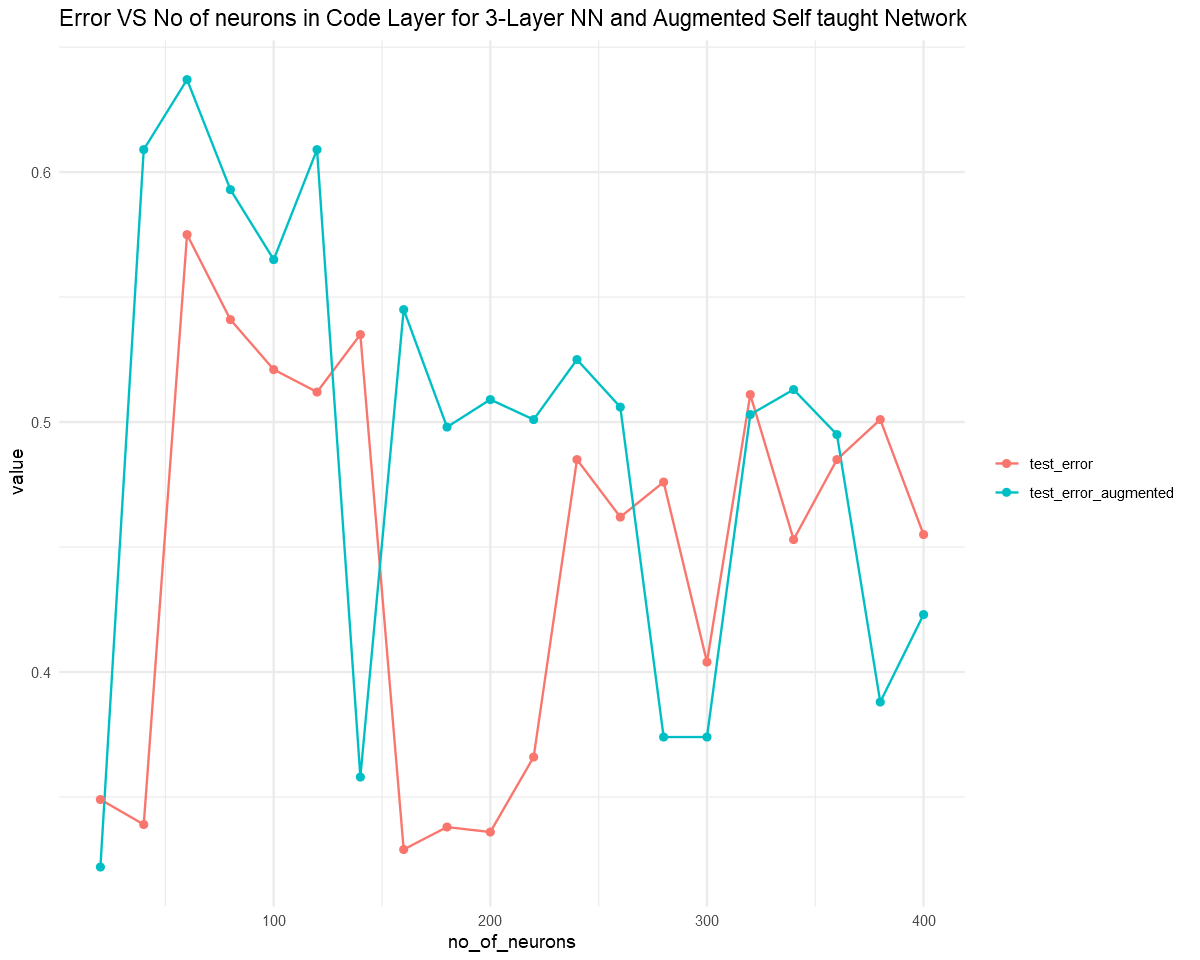

In [14]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data=combined_error_df_NN, aes(x=no_of_neurons, y=value, color=variable)) + geom_line() + geom_point()+
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Error VS No of neurons in Code Layer for 3-Layer NN and Augmented Self taught Network")

#### Augmented test error vs Classification test error : 

1. The test error for both the  Models is somewhat same for the  initial values of the neurons i.e. from 30 to 60.

2. It can be seen that the augmented  self taught model peroforms better for higher values of neurons. 


3.  The lowest testing error for AUgmented Self taught is at 30 neurons.

4. The lowest testing error for Three Layer Neural network is around 160 Neurons.

5. The Augmented Self Taught Learning has highest testing error for just under 60 Neurons.

6. The 3 Layer NN Classifier has highest test error for the number of neurons just over 50. 

7. Hence, for higher Values of Neurons the Augmented Model performs better as opposed to the 3 Layer NN.